In [1]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d as p3
import numpy as np

from functools import partial
from ipywidgets import interact, RadioButtons, IntSlider, FloatSlider, Dropdown, BoundedFloatText
from numpy.linalg import norm
from single_layer_networks.rosenblatt import Perceptron

In [2]:
def plot_line(coefs):
    """
    рисует разделяющую прямую, соответствующую весам, переданным в coefs = (weights, bias), 
    где weights - ndarray формы (2, 1), bias - число
    """
    w, bias = coefs
    a, b = - w[0][0] / w[1][0],  bias / w[1][0]
    xx = np.linspace(*plt.xlim())
    line.set_data(xx, a*xx + b)

In [3]:
def step_by_step_weights(p, input_matrix, y, max_steps=1e6):
    """
    обучает перцептрон последовательно на каждой строчке входных данных, 
    возвращает обновлённые веса при каждом их изменении
    p - объект класса Perceptron
    """
    i = 0
    errors = 1
    while errors and i < max_steps:
        i += 1
        errors = 0
        for example, answer in zip(input_matrix, y):
            error = p.train_on_single_example(example, answer)
            errors += error
            if error:  # будем обновлять положение линии только тогда, когда она изменила своё положение
                yield p._w[:-1], p._w[-1:]

In [4]:
from matplotlib.animation import FuncAnimation # создаёт анимацию вызывая переданную функцию на переданном fig
from functools import partial

<IPython.core.display.Javascript object>


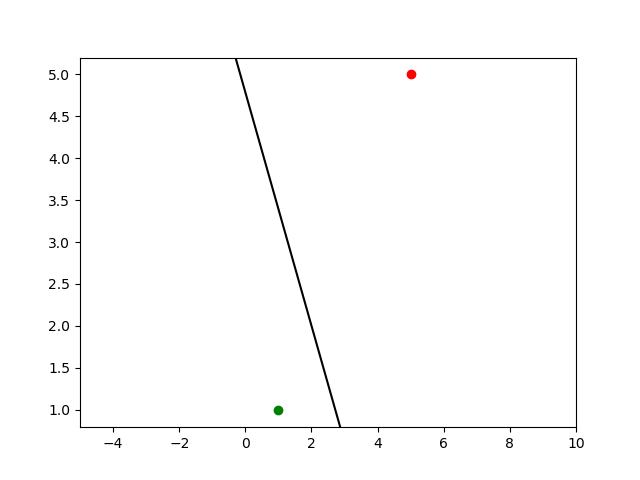

In [5]:
#%matplotlib notebook
%matplotlib nbagg
X = np.array([[1,1],[5,5]])
y = np.array([1, 0])
fig = plt.figure()
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='g')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='r')
line, = plt.plot([], [], color='black')
plt.xlim(-5,10)


ppn_rosenblatt = Perceptron(X)

weights_any = partial(step_by_step_weights, p=ppn_rosenblatt, input_matrix=X, y = y)
ani = FuncAnimation(fig, func=plot_line, frames=weights_any, blit=False, interval=100, repeat=True)
plt.show()

<IPython.core.display.Javascript object>


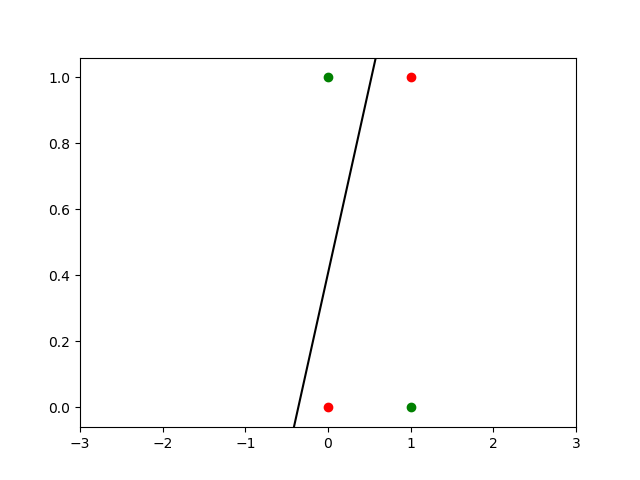

In [6]:
#%matplotlib notebook
%matplotlib nbagg
X = np.array([[1,1],[0,1],[1,0],[0,0]])
y = np.array([0, 1,1,0])
fig = plt.figure()
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='g')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='r')
line, = plt.plot([], [], color='black')
plt.xlim(-3,3)


ppn_rosenblatt = Perceptron(X)

weights_any = partial(step_by_step_weights, p=ppn_rosenblatt, input_matrix=X, y = y)
ani = FuncAnimation(fig, func=plot_line, frames=weights_any, blit=False, interval=100, repeat=True)
plt.show()

In [7]:
def step_by_step_errors(p, input_matrix, y, max_steps=1e6):
    """
    обучает перцептрон последовательно на каждой строчке входных данных, 
    на каждом шаге обучения запоминает количество неправильно классифицированных примеров
    и возвращает список из этих количеств
    """
    def count_errors():
        return np.abs(p.predict(input_matrix).astype(np.int) - y.reshape(y.shape[0],1)).sum()
    errors_list = [count_errors()]
    i = 0
    errors = 1
    while errors and i < max_steps:
        i += 1
        errors = 0
        for example, answer in zip(input_matrix, y):            
            error = p.train_on_single_example(example, answer)
            errors += np.abs(error)
            errors_list.append(count_errors())
    return errors_list

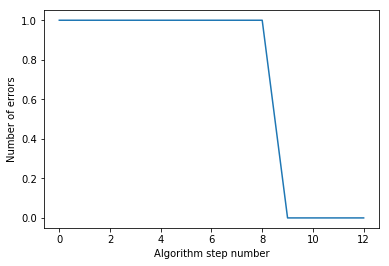

In [8]:
%matplotlib inline
X = np.array([[1,1],[5,5]])
y = np.array([1, 0])
ppn_rosenblatt = Perceptron(X)
errors_list = step_by_step_errors(ppn_rosenblatt, X, y)
plt.plot(errors_list);
plt.ylabel("Number of errors")
plt.xlabel("Algorithm step number");
plt.show()

In [9]:
from sklearn.datasets import load_iris
i = load_iris()


<IPython.core.display.Javascript object>


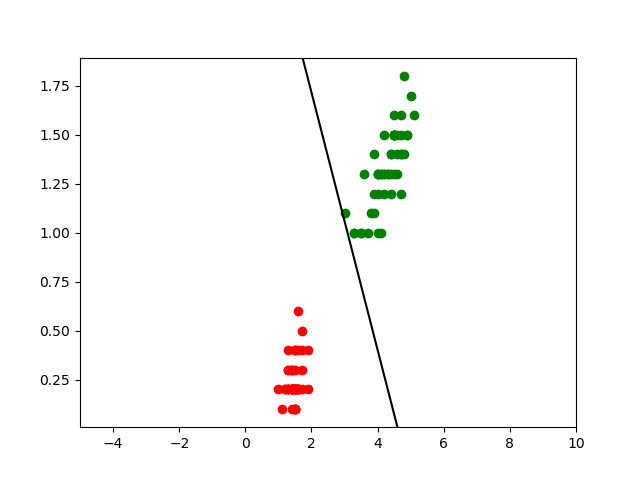

In [10]:
#%matplotlib notebook
%matplotlib nbagg
X = i.data[:100, 2:4]
y = i.target[:100]
fig = plt.figure()
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], c='g')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], c='r')
line, = plt.plot([], [], color='black')
plt.xlim(-5,10)


ppn_rosenblatt = Perceptron(X)

weights_any = partial(step_by_step_weights, p=ppn_rosenblatt, input_matrix=X, y = y)
ani = FuncAnimation(fig, func=plot_line, frames=weights_any, blit=False, interval=100, repeat=True)
plt.show()

# Вывод: если объекты линейно разделимы, то находит решение, но оно вряди ли является лучшим

In [11]:
def step_by_step_errors(p, input_matrix, y, max_steps=1e6):
    """
    обучает перцептрон последовательно на каждой строчке входных данных, 
    на каждом шаге обучения запоминает количество неправильно классифицированных примеров
    и возвращает список из этих количеств
    """
    def count_errors():
        return np.abs(p.predict(input_matrix).astype(np.int) - y.reshape(y.shape[0],1)).sum()
    errors_list = [count_errors()]
    i = 0
    errors = 1
    while errors and i < max_steps:
        i += 1
        errors = 0
        for example, answer in zip(input_matrix, y):            
            error = p.train_on_single_example(example, answer)
            errors += np.abs(error)
            errors_list.append(count_errors())
    return errors_list

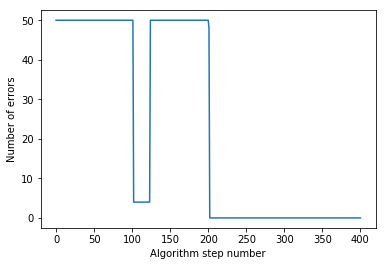

In [13]:
%matplotlib inline
X = i.data[:100, 2:4]
y = i.target[:100]
ppn_rosenblatt = Perceptron(X)
errors_list = step_by_step_errors(ppn_rosenblatt, X, y)
plt.plot(errors_list);
plt.ylabel("Number of errors")
plt.xlabel("Algorithm step number");
plt.show()